In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Upload Kaggle API key
from google.colab import files
files.upload()


#Load the data into a DataFrame
data = pd.read_csv('prices.csv')

# Display the first few rows and dataset info
print(data.head())
print(data.info())

Saving prices.csv to prices.csv
                  date symbol        open       close         low        high  \
0  2016-01-05 00:00:00   WLTW  123.430000  125.839996  122.309998  126.250000   
1  2016-01-06 00:00:00   WLTW  125.239998  119.980003  119.940002  125.540001   
2  2016-01-07 00:00:00   WLTW  116.379997  114.949997  114.930000  119.739998   
3  2016-01-08 00:00:00   WLTW  115.480003  116.620003  113.500000  117.440002   
4  2016-01-11 00:00:00   WLTW  117.010002  114.970001  114.089996  117.330002   

      volume  
0  2163600.0  
1  2386400.0  
2  2489500.0  
3  2006300.0  
4  1408600.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    85

In [4]:
# Check for missing values
print(data.isnull().sum())

# Basic statistical description
print(data.describe())

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64
                open          close            low           high  \
count  851264.000000  851264.000000  851264.000000  851264.000000   
mean       70.836986      70.857109      70.118414      71.543476   
std        83.695876      83.689686      82.877294      84.465504   
min         0.850000       0.860000       0.830000       0.880000   
25%        33.840000      33.849998      33.480000      34.189999   
50%        52.770000      52.799999      52.230000      53.310001   
75%        79.879997      79.889999      79.110001      80.610001   
max      1584.439941    1578.130005    1549.939941    1600.930054   

             volume  
count  8.512640e+05  
mean   5.415113e+06  
std    1.249468e+07  
min    0.000000e+00  
25%    1.221500e+06  
50%    2.476250e+06  
75%    5.222500e+06  
max    8.596434e+08  


In [5]:
df = data
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,NaT,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,NaT,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,NaT,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


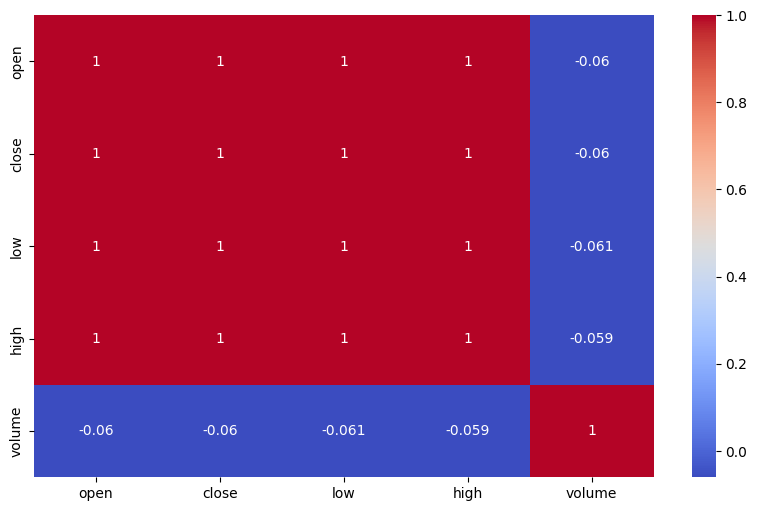

In [6]:
#Visualisation od the data
plt.figure(figsize=(10, 6))
sns.heatmap(df[['open', 'close', 'low', 'high', 'volume']].corr(), annot=True, cmap='coolwarm')
plt.show()

In [7]:
#preparation of the data and Establishing a Deep Neural network Architecture by using PyTorch library to handle the regression task
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset, random_split
X = df[['open', 'low', 'high', 'volume']].values
y = df['close'].values
#nomalisation of the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
#conversion to tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).view(-1, 1)
#creation of dataloaders
dataset = TensorDataset(X, y)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64)

In [8]:
#definition of the neural network model :
class StockPredictor(nn.Module):
    def __init__(self):
        super(StockPredictor, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(4, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.layers(x)

model = StockPredictor()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
#the use of GridSearch to chose the best hyper-parameters
learning_rates = [0.01, 0.001, 0.0001]
num_epochs = [50, 100]

#training
def train_model(model, train_loader, test_loader, learning_rate, epochs):
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    train_losses, test_losses = [], []

    for epoch in range(epochs):
        model.train()
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            loss.backward()
            optimizer.step()


        train_loss, test_loss = 0.0, 0.0
        with torch.no_grad():
            model.eval()
            for X_batch, y_batch in train_loader:
                train_loss += criterion(model(X_batch), y_batch).item()
            for X_batch, y_batch in test_loader:
                test_loss += criterion(model(X_batch), y_batch).item()

        train_losses.append(train_loss / len(train_loader))
        test_losses.append(test_loss / len(test_loader))

    return train_losses, test_losses

for lr in learning_rates:
    for epochs in num_epochs:
        model = StockPredictor()
        train_losses, test_losses = train_model(model, train_loader, test_loader, lr, epochs)
        plt.plot(range(epochs), train_losses, label=f'Train Loss (lr={lr}, epochs={epochs})')
        plt.plot(range(epochs), test_losses, label=f'Test Loss (lr={lr}, epochs={epochs})')

#Visualize the two graph for both training and test data
plt.xlabel('Époques')
plt.ylabel('Loss')
plt.title('Courbe de la Loss en fonction des Époques')
plt.legend()
plt.show()

In [ ]:
#Application of  several regularization techniques on the architecture
class StockPredictorWithRegularization(nn.Module):
    def __init__(self):
        super(StockPredictorWithRegularization, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(4, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.layers(x)

model = StockPredictorWithRegularization()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

# training
train_losses, test_losses = train_model(model, train_loader, test_loader, 0.001, 100)

# Visualisation
plt.plot(range(100), train_losses, label='Train Loss')
plt.plot(range(100), test_losses, label='Test Loss')
plt.xlabel('Époques')
plt.ylabel('Loss')
plt.title('Courbe de la Loss avec Dropout et L2')
plt.legend()
plt.show()